#  Bagging Vs Gradient Boosting

## About the Notebook: 

I have approached the case study in the following way. 
- Started with the data visualization, EDA and then worked on the Data Imputation and data encoding with the help of One hot Encoding library.
- In modelling I first build a standalone models of logistic regression, Naive Bayes, Decision tree and Random forrest. 
- Then I used the ensemblem techniques - bagging and gradient boosting on the same dataset and build the same 4 models
- Finally I had compared the confusion matrix, accuracy, presicion, recall and f1scores and given my conclusion for this exercise

### About data:
The data has 16 independent variables and 1 Target variable with is about which customer subscribe to the term deposits

### Steps and tasks:

1. Import the necessary libraries 
2. Read the data as a data frame
3. Perform basic EDA which should include the following and print out your insights
at every step.
    a. Shape of the data 
    b. Data type of each attribute 
    c. Checking the presence of missing values 
    d. 5 Point summary of numerical attributes  
    e. Checking the presence of outliers 
4. Prepare the data to train a model – check if data types are appropriate, get rid of
the missing values etc. 
5. Train a few standard classification algorithms, note and comment on their
performances across different classification metrics.
6. Build the ensemble models and compare the results with the base models. Note:
Random forest can be used only with Decision trees. 
7. Compare performances of all the models 


### 1. Import the necessary libraries


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
%matplotlib inline

### 2. Read the data as a data frame

In [14]:
bk = pd.read_csv("C:/Users/thiruvenkadam/Documents/MLAI/GL AIML/Assignments/Ensemble techniques/Bank.csv")
bk.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


##### Insights
- The data is has information of 17 parameters. 16 independent variables and one taget variable which is "subcribtion to Term deposit"

### 3.Perform basic EDA which should include the following and print out your insights at every step. 



In [15]:
bk.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Insights
- The average age of customers in the dataset is 40
- The average yearly balance for the customers in the dataset is 1362 and the median balance is 448, indicating the average is skewed due to few account holders maintaining high balance
- The average call duration is 258 secs with median duration at around 180 secs. This should be because of few longrer calls

### 3a. Shape of the data

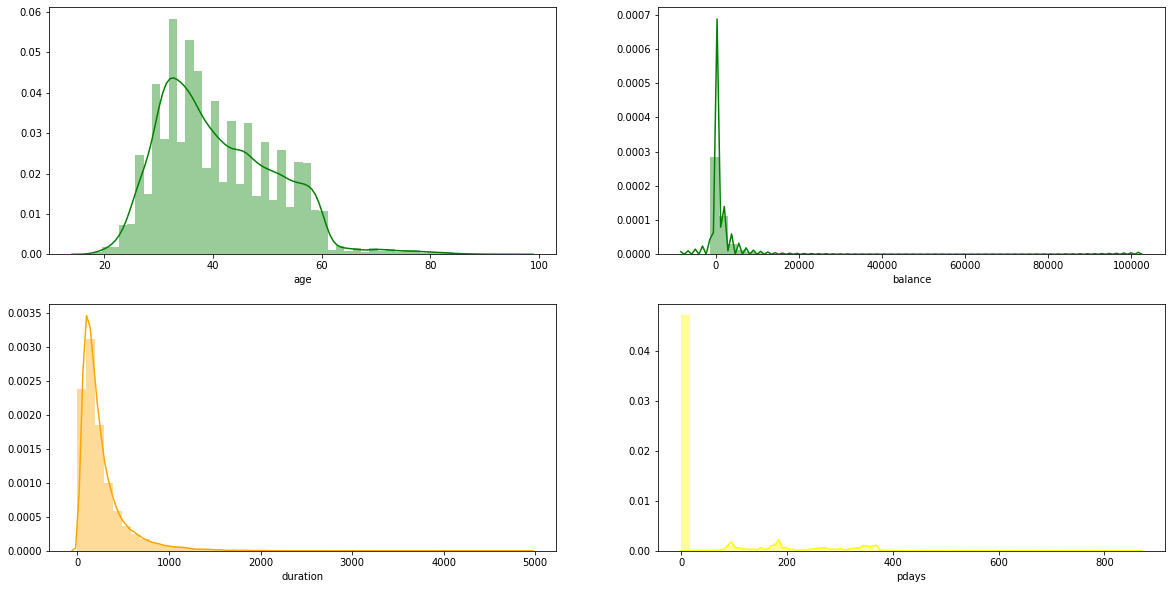

In [10]:
# distribution of the continuous variables
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.distplot(bk["age"], color="green") # age column
plt.subplot(222)
sns.distplot(bk["balance"], color="green")# balance column
plt.subplot(223)
sns.distplot(bk["duration"], color="orange")# duration column
plt.subplot(224)
sns.distplot(bk["pdays"], color = "yellow")# pdays column


#### Insights
- The age looks normally distributed with multiple smaller peaks and slightly skewed towards right due to few older customers
- The average yearly balance data is extremely skewed towards right due to very few account holders having a balance of over 100k euros
- The call duration data is also right skewed with few calls going over an hour and half

### 3b. Data types of each attributes

In [75]:
bk.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

### Insights
- The dataset has 10 discrete columns and 7 Integer columns (which includes date and month)

### 3c.Checking missing value in the dataframe

In [87]:
# Check for missing values
bk.isnull().values.any()

False

### Insights
- There are no missing values in the data

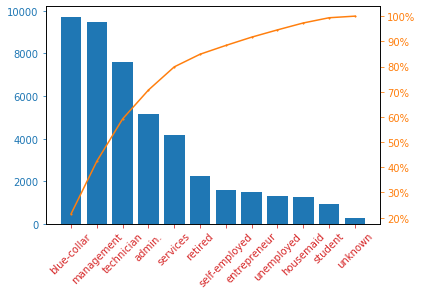

In [31]:
# Pareto chart by job of customers
from matplotlib.ticker import PercentFormatter
bk_p = pd.DataFrame(bk["job"].value_counts())
bk_p["cumpercentage"] = bk_p["job"].cumsum()/bk_p["job"].sum()*100 # Calculating cummulative percentage
fig, ax = plt.subplots()
ax.bar(bk_p.index, bk_p["job"], color="C0")
ax2 = ax.twinx() # defining secondary axis for cummulative percent
ax2.plot(bk_p.index, bk_p["cumpercentage"], color="C1", marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.tick_params(axis="x", colors="C3", labelrotation = 45)
plt.show()

#### Insights
- Customers in bluecollar job are the highest among all the job categories
- Over 80% of customers comes under either of these 5 categories
        - blue collar
        - management
        - technician
        - admin
        - services

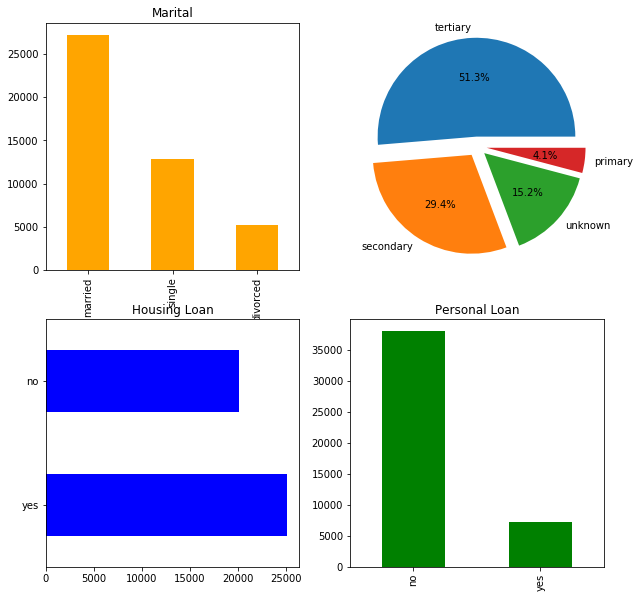

In [35]:
# EDA of Discrete variables
plt.figure(figsize=(10,10))
plt.subplot(221)
ax2=bk['marital'].value_counts().plot(kind='bar', color="orange")
ax2.title.set_text('Marital')
plt.subplot(222)
ax3 = plt.pie(bk['education'].value_counts(), labels = bk.education.unique(), autopct='%1.1f%%', labeldistance = 1.1,explode = (0.1, 0.1, 0.1, 0.1))
plt.subplot(223)
ax5=bk['housing'].value_counts().plot(kind='barh', color="blue" )
ax5.title.set_text('Housing Loan')
plt.subplot(224)
ax6=bk['loan'].value_counts().plot(kind='bar', color="green" )
ax6.title.set_text('Personal Loan')

#### Insights
- More than half of the customers in the dataset are married
- More than half of the customers in the dataet are graduated (gone beyond secondary education)
- over 60% of the people have housing loan and only around 40% dont have housing loan
- Less than 20% of the population has personal loan

### 3d & e 5 point summary and presence of outliers

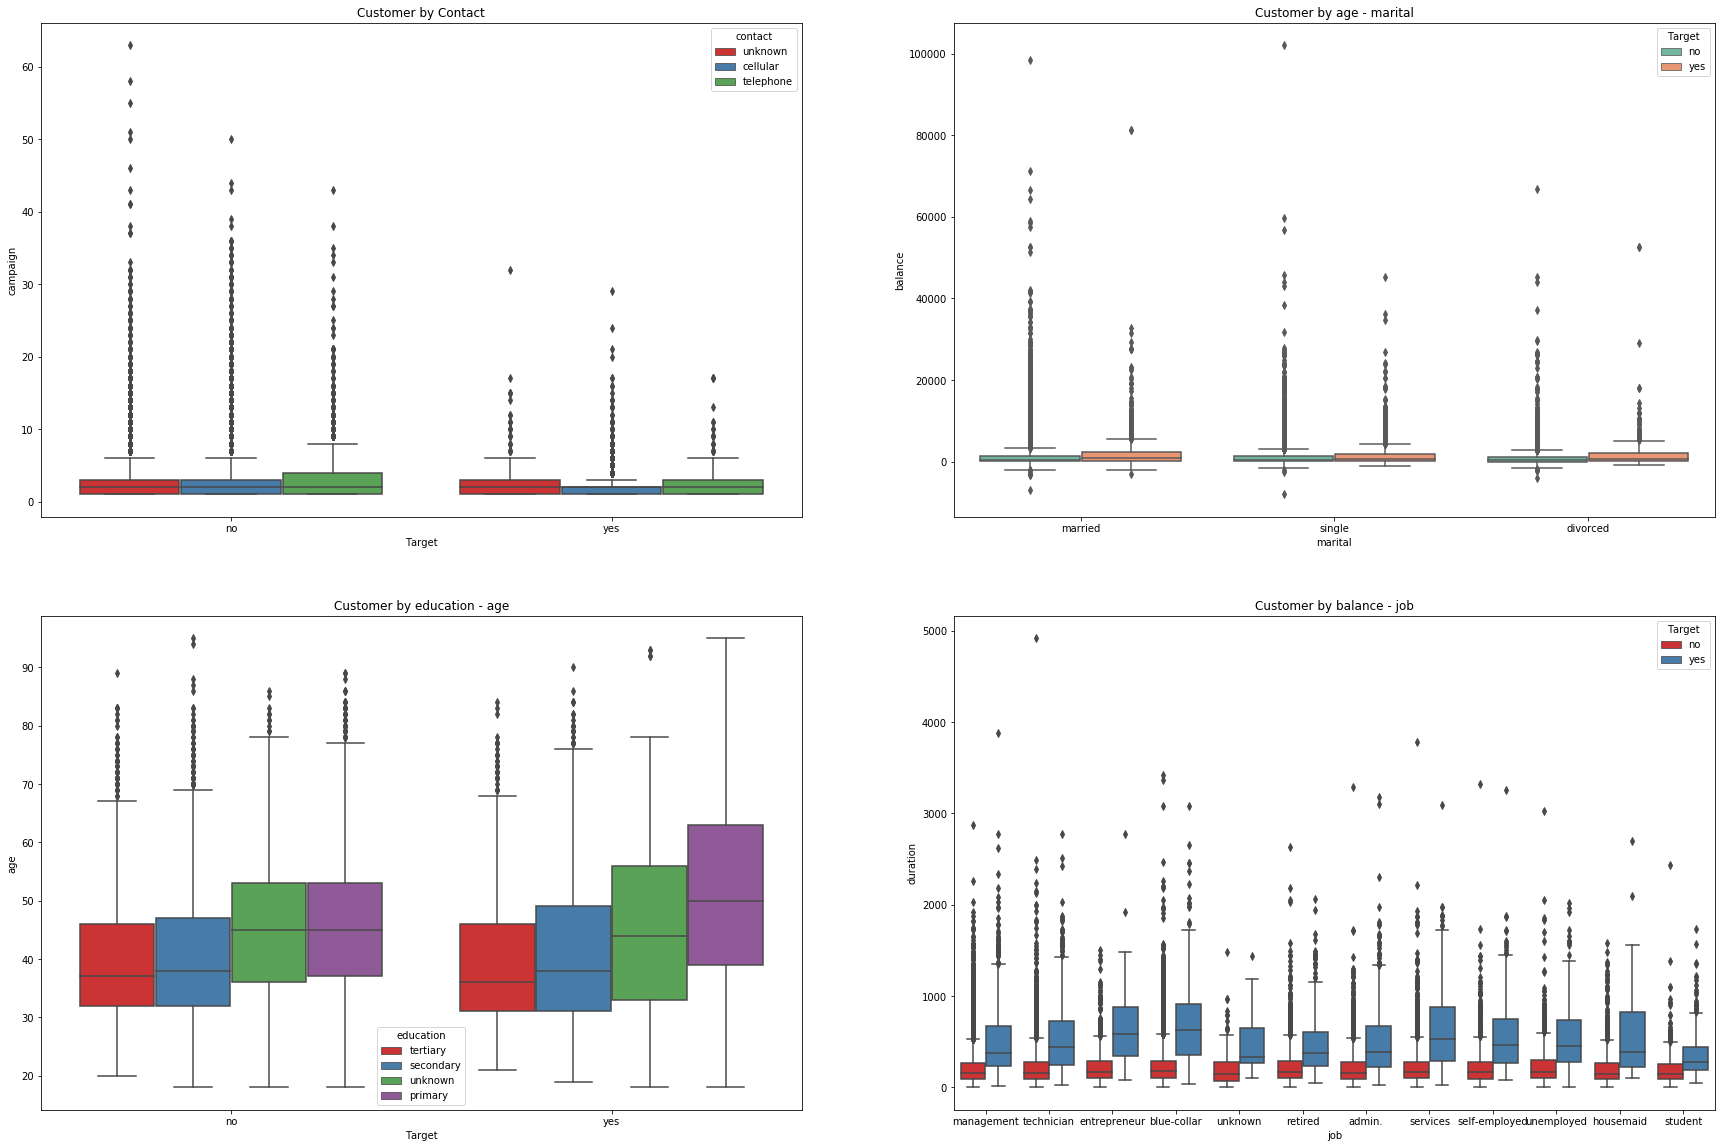

In [36]:
plt.figure(figsize=(30,20))
plt.subplot(221)
ax4=sns.boxplot(x="Target", y="campaign", hue="contact",palette="Set1", data=bk)
ax4.title.set_text('Customer by Contact')
plt.subplot(222)
ax4=sns.boxplot(x="marital", y="balance", hue="Target",palette="Set2", data=bk)
ax4.title.set_text('Customer by age - marital')
plt.subplot(223)
ax4=sns.boxplot(x="Target", y="age", hue="education",palette="Set1", data=bk)
ax4.title.set_text('Customer by education - age')
plt.subplot(224)
ax4=sns.boxplot(x="job", y="duration", hue="Target",palette="Set1", data=bk)
ax4.title.set_text('Customer by balance - job')

### Insights
- from the 2nd box plot it is visibile that customers with higher average yearly balance have subscribed to term deposits, which is in line with the common sense
- The call duration seems to be higher in case of people who subscribed to term deposit. This can be the other way too, i.e the customer had subscribed for the product so the call duration is higher to collect more customer information
- lot of outliers were found in both duration and balance data

### Correlation matrix

In [37]:
bk.corr().style.background_gradient(cmap='coolwarm').set_precision(1)

,age,balance,day,duration,campaign,pdays,previous
age,1,0.1,-0.009,-0.005,0.005,-0.02,0.001
balance,0.1,1,0.005,0.02,-0.01,0.003,0.02
day,-0.009,0.005,1,-0.03,0.2,-0.09,-0.05
duration,-0.005,0.02,-0.03,1,-0.08,-0.002,0.001
campaign,0.005,-0.01,0.2,-0.08,1,-0.09,-0.03
pdays,-0.02,0.003,-0.09,-0.002,-0.09,1,0.5
previous,0.001,0.02,-0.05,0.001,-0.03,0.5,1


### Insights
- none of the variables has any significant correlation between each other

### 4. Prepare the data to train the model

In [16]:
dict = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
bk1 = bk.replace({"month": dict}) # replacing the months to numeric value
bk1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no


In [17]:
# encode the target variable with 0s and 1s
dict = {"yes": 1, "no":0}
bk2 = bk1.replace({"Target":dict}) # coding the Target variable
bk2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0


In [88]:
# using Onehot encoding to encode the categorical variables
df = pd.get_dummies(bk2, columns =['job', 'marital', 'education','default', 'housing', 'loan', 'poutcome','contact'])
df.head() # encoding the discrete variables using dummies 

,age,balance,day,month,duration,campaign,pdays,previous,Target,job_admin.,...,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,2143,5,5,261,1,-1,0,0,0,...,1,1,0,0,0,0,1,0,0,1
1,44,29,5,5,151,1,-1,0,0,0,...,1,1,0,0,0,0,1,0,0,1
2,33,2,5,5,76,1,-1,0,0,0,...,1,0,1,0,0,0,1,0,0,1
3,47,1506,5,5,92,1,-1,0,0,0,...,1,1,0,0,0,0,1,0,0,1
4,33,1,5,5,198,1,-1,0,0,0,...,0,1,0,0,0,0,1,0,0,1


### Split the dataset to training and test data

In [19]:
# Spliting the data into training and test set in ratio of 70:30
X = df.drop('Target',axis=1)     # Predictor feature columns (8 X m)
Y = df['Target']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number
y_train.head()


6149     0
12403    0
21645    0
29580    0
31245    0
Name: Target, dtype: int64

In [20]:
# checking the data split
print("{0:0.2f}% data is in training set".format((len(x_train)/len(bk.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bk.index)) * 100))

70.00% data is in training set
30.00% data is in test set


## 5.Build Standard classification models
### Logistic Regression

In [49]:
#Defining the logistic regression model
regression_model = LogisticRegression(solver="liblinear", penalty = "l1", class_weight = {0: 1, 1:2})
regression_model.fit(x_train, y_train)
for idx, col_name in enumerate(x_train.columns): # calculate all the coefficient for the model
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept)) # print the intercept for the model

The coefficient for age is -0.000622114611316589
The coefficient for balance is 2.3079429438857373e-05
The coefficient for day is -0.007010445183927445
The coefficient for month is -0.011566314374314574
The coefficient for duration is 0.004657663198883581
The coefficient for campaign is -0.11202506000430523
The coefficient for pdays is 9.027489331250357e-05
The coefficient for previous is 0.0248681581043557
The coefficient for job_admin. is 0.30245375711971084
The coefficient for job_blue-collar is -0.14861697504893467
The coefficient for job_entrepreneur is -0.3359587711337459
The coefficient for job_housemaid is -0.2288954521686032
The coefficient for job_management is 0.058532468605303443
The coefficient for job_retired is 0.7237673919942664
The coefficient for job_self-employed is -0.16866527120940306
The coefficient for job_services is -0.035600096123155144
The coefficient for job_student is 0.8031953592992428
The coefficient for job_technician is -0.007484432580681809
The coeffic

In [50]:
# predicting the model accuracy in both training ang test data
y_predict = regression_model.predict(x_test)
print("The model accuracy in training set:{0:.4f}".format(regression_model.score(x_train, y_train)))
print("The model accuracy in test set is:{0:.4f}".format(regression_model.score(x_test, y_test)))

The model accuracy in training set:0.8970
The model accuracy in test set is:0.8993


### Decision tree classifier

In [51]:
dt_model = DecisionTreeClassifier(criterion = 'gini', class_weight = {0: 1, 1:2})
dt_model.fit(x_train, y_train)
dt_model.score(x_test, y_test)
y_predict_dt = dt_model.predict(x_test)
print("Model Accuracy in Test set: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict_dt)))

Model Accuracy in Test set: 0.8755


### Random forest classifier

In [52]:
rfcl = RandomForestClassifier(criterion = 'gini', class_weight = {0: 1, 1:2}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(x_train, y_train)
y_predict_rf = rfcl.predict(x_test)
rfcl.score(x_test, y_test)
print("Model Accuracy in Test set: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict_rf)))

Model Accuracy in Test set: 0.8994


C:\Users\thiruvenkadam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Naive Bayes

In [54]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_ytrain_pred = nb.predict(x_train)
y_nbpredict = nb.predict(x_test)
print("Model Accuracy in Training set: {0:.4f}".format(metrics.accuracy_score(y_train, nb_ytrain_pred)))
print("Model Accuracy in Test set: {0:.4f}".format(metrics.accuracy_score(y_test, y_nbpredict)))

Model Accuracy in Training set: 0.8232
Model Accuracy in Test set: 0.8209


### Insights
- Except the naive bayes all the other algorithms have accuracy of greater than 88% 
- Though the accuracy is fairly reasonable the model has very high dimension i.e the model is build with 40 variables of which many would not significantly contribute to the classification, hence we will apply the regularization in next section to reduce some dimensions

## 6a.Ensemble using bagging

In [62]:
# Ensemble with Decision tree as base_estimator
from sklearn.ensemble import BaggingClassifier
bgcl_cart = BaggingClassifier(base_estimator=dt_model, n_estimators=10, max_samples= .7, bootstrap=True)
bgcl_cart = bgcl_cart.fit(x_train, y_train)
test_pred_bgcart = bgcl_cart.predict(x_test)
# Ensemble with Decision tree as base_estimator
bgcl_lgreg = BaggingClassifier(base_estimator=regression_model,n_estimators=10, max_samples= .7, bootstrap=True)
bgcl_lgreg = bgcl_lgreg.fit(x_train, y_train)
test_pred_bglgreg = bgcl_lgreg.predict(x_test)
# Ensemble with Gaussian Naive Bayes as base_estimator
bgcl_nb = BaggingClassifier(base_estimator=nb, n_estimators=10, max_samples= .7, bootstrap=True)
bgcl_nb = bgcl_nb.fit(x_train, y_train)
test_pred_bgnb = bgcl_nb.predict(x_test)
# Ensemble with Random Forest as base_estimator
bgcl_rf = BaggingClassifier(base_estimator=RandomForestClassifier(criterion = 'gini', class_weight={0:1,1:2}), n_estimators=10, max_samples= .7, bootstrap=True)
bgcl_rf = bgcl_rf.fit(x_train, y_train)
test_pred_bgrf = bgcl_rf.predict(x_test)

#print the accuracy of all the bagging models
print("Bagging model accuracy with Logistic regression estimator: {0:.4f}".format(bgcl_lgreg.score(x_test, y_test)))
print("Bagging model accuracy with Decision tree estimator: {0:.4f}".format(bgcl_cart.score(x_test, y_test)))
print("Bagging model accuracy with Random forest estimator: {0:.4f}".format(bgcl_rf.score(x_test, y_test)))
print("Bagging model accuracy with Naive Bayes estimator: {0:.4f}".format(bgcl_nb.score(x_test, y_test)))

C:\Users\thiruvenkadam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\thiruvenkadam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\thiruvenkadam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\thiruvenkadam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\thiruvenkadam\Anaconda3\lib\site-pa

Bagging model accuracy with Logistic regression estimator: 0.8988
Bagging model accuracy with Decision tree estimator: 0.9032
Bagging model accuracy with Random forest estimator: 0.9044
Bagging model accuracy with Naive Bayes estimator: 0.8193


## 6b Ensembling using gradient boosting

In [64]:
# Ensemble with Decision tree as init
from sklearn.ensemble import GradientBoostingClassifier
gbcl_cart = GradientBoostingClassifier(init=DecisionTreeClassifier(class_weight = {0: 1, 1:2}), n_estimators = 50, learning_rate = 0.05)
gbcl_cart = gbcl_cart.fit(x_train, y_train)
test_pred_gbcart=gbcl_cart.predict(x_test)
# Ensemble with Logistic regression estimator
gbcl_lgreg = GradientBoostingClassifier(init=regression_model, n_estimators = 50, learning_rate = 0.05)
gbcl_lgreg = gbcl_lgreg.fit(x_train, y_train)
test_pred_gblgreg = gbcl_lgreg.predict(x_test)
# Ensemble with Gaussian Naive Bayes as estimator
gbcl_nb = GradientBoostingClassifier(init=nb, n_estimators = 10,learning_rate = 0.05)
gbcl_nb = gbcl_nb.fit(x_train, y_train)
test_pred_gbnb = gbcl_nb.predict(x_test)
# Ensemble with Random Forest as estimator
gbcl_rf = GradientBoostingClassifier(init=RandomForestClassifier(criterion = 'gini', class_weight={0:1,1:2}), n_estimators = 50, learning_rate = 0.05)
gbcl_rf = gbcl_rf.fit(x_train, y_train)
test_pred_gbrf = gbcl_rf.predict(x_test)
#print the accuracy of all the gradient boosting model
print("Gradient Boosting model accuracy with Logistic regression estimator: {0:.4f}".format(gbcl_lgreg.score(x_test, y_test)))
print("Gradient Boosting model accuracy with Decision tree estimator: {0:.4f}".format(gbcl_cart.score(x_test, y_test)))
print("Gradient Boosting model accuracy with Random forest estimator: {0:.4f}".format(gbcl_rf.score(x_test, y_test)))
print("Gradient Boosting model accuracy with Naive Bayes estimator: {0:.4f}".format(gbcl_nb.score(x_test, y_test)))

C:\Users\thiruvenkadam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Gradient Boosting model accuracy with Logistic regression estimator: 0.9022
Gradient Boosting model accuracy with Decision tree estimator: 0.8739
Gradient Boosting model accuracy with Random forest estimator: 0.9022
Gradient Boosting model accuracy with Naive Bayes estimator: 0.8548


### Insights
- The accuracy of models with a good accuracy doesnt seem to have any significant improvement by bagging or boosting ensembling whereas the models with previously low accuracy like Naive Bayes have a improved accuracy. The standard Naive Bayes model has a accuracy of 82% wherease the ensembled model has accuracy of 86.7 and 88.7% respectively for bagged and boosted models

## 7. Comparing the all the models - Standard Vs Bagging Vs Gradient Boosting

In [65]:
# Logistic regression_Standard - Confusion Matrix
cmlgreg=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cmlgreg = pd.DataFrame(cmlgreg, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
# Regularized Logistic regression bagging - Confusion Matrix 
cm_bglgreg=metrics.confusion_matrix(y_test, test_pred_bglgreg, labels=[1, 0])
df_cm_bglgreg = pd.DataFrame(cm_bglgreg, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
# Regularized Logistic regression boosting - Confusion Matrix 
cm_gblgreg=metrics.confusion_matrix(y_test, test_pred_gblgreg, labels=[1, 0])
df_cm_gblgreg = pd.DataFrame(cm_gblgreg, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
# Decision tree_Standard - Confusion Matrix
cmdt=metrics.confusion_matrix(y_test, y_predict_dt, labels=[1, 0])
df_cmdt = pd.DataFrame(cmdt, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
# Regularized Decision tree bagging - Confusion Matrix 
cm_bgdt=metrics.confusion_matrix(y_test, test_pred_bgcart, labels=[1, 0])
df_cm_bgdt = pd.DataFrame(cm_bgdt, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
# Regularized Decision tree boosting - Confusion Matrix 
cm_gbdt=metrics.confusion_matrix(y_test, test_pred_gbcart, labels=[1, 0])
df_cm_gbdt = pd.DataFrame(cm_gbdt, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
# Random forest_Standard - Confusion Matrix
cmrf=metrics.confusion_matrix(y_test, y_predict_rf, labels=[1, 0])
df_cmrf = pd.DataFrame(cmrf, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
# Regularized Random forest bagging - Confusion Matrix 
cm_bgrf=metrics.confusion_matrix(y_test, test_pred_bgrf, labels=[1, 0])
df_cm_bgrf = pd.DataFrame(cm_bgrf, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
# Regularized Random forest boosting - Confusion Matrix 
cm_gbrf=metrics.confusion_matrix(y_test, test_pred_gbrf, labels=[1, 0])
df_cm_gbrf = pd.DataFrame(cm_gbrf, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
# Naive Bayes_Standard - Confusion Matrix
cmnb=metrics.confusion_matrix(y_test, y_nbpredict, labels=[1, 0])
df_cmnb = pd.DataFrame(cmnb, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
# Regularized Naive Bayes bagging - Confusion Matrix 
cm_bgnb=metrics.confusion_matrix(y_test, test_pred_bgnb, labels=[1, 0])
df_cm_bgnb = pd.DataFrame(cm_bgnb, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
# Regularized Naive Bayes boosting - Confusion Matrix 
cm_gbnb=metrics.confusion_matrix(y_test, test_pred_gbnb, labels=[1, 0])
df_cm_gbnb = pd.DataFrame(cm_gbnb, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

### Decision tree - Confusion Matrix heatmap and Classification report 

Classification score - Decision tree standard:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     12013
           1       0.46      0.48      0.47      1551

    accuracy                           0.88     13564
   macro avg       0.69      0.70      0.70     13564
weighted avg       0.88      0.88      0.88     13564

Classification score - Regularized Decision tree with bagging:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.62      0.40      0.48      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564

Classification score - Regularized Decision tree with boosting:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     12013
           1       0.45      0.47      0.46      1551

    a

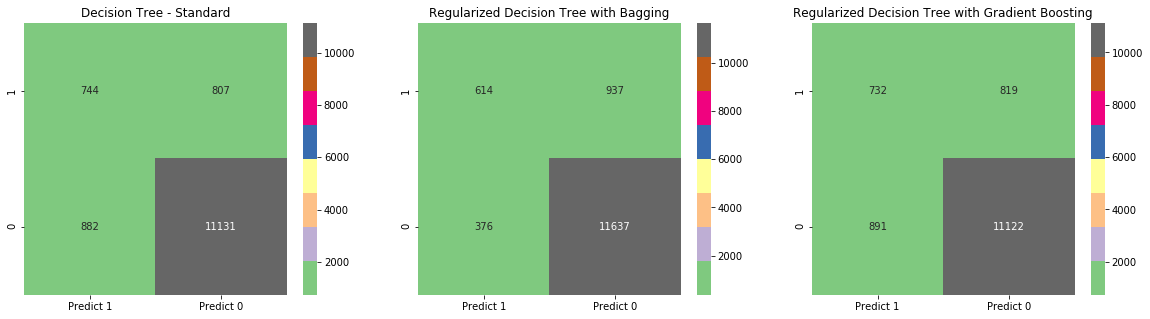

In [66]:
# Confusion matrix heat map - Decision tree  - Standard vs Regularized bagging vs Regularized boosting
plt.figure(figsize = (20,5))
# print classification report with precision, recall, accuracy, f1 score and support
print("Classification score - Decision tree standard:\n",
      (classification_report(y_test, y_predict_dt)))
print("Classification score - Regularized Decision tree with bagging:\n",
      (classification_report(y_test, test_pred_bgcart)))
print("Classification score - Regularized Decision tree with boosting:\n",
      (classification_report(y_test, test_pred_gbcart)))
plt.subplot(131)
ax1=sns.heatmap(df_cmdt, cmap="Accent", annot=True,fmt = '')
ax1.title.set_text('Decision Tree - Standard')
plt.subplot(132)
ax2=sns.heatmap(df_cm_bgdt, cmap="Accent", annot=True, fmt = '')
ax2.title.set_text('Regularized Decision Tree with Bagging')
plt.subplot(133)
ax3=sns.heatmap(df_cm_gbdt, cmap="Accent", annot=True, fmt = '')
ax3.title.set_text('Regularized Decision Tree with Gradient Boosting')

### Insights
- The standard decision tree has a accuracy of 88% which is improved to 90% with bagging method whereas it is just 87% with gradient boosting. Hence bagging ensembling technique had increased the accuracy by 3% compared to standard decision tree
- Though the accuracy is at 90% the precision and recall of the predicting a customer who would opt for the term deposit is just around 50% across all the models. 

### Naive Bayes - Confusion Matrix heatmap and Classification report 

Classification score - Naive Bayes standard:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89     12013
           1       0.33      0.56      0.42      1551

    accuracy                           0.82     13564
   macro avg       0.63      0.71      0.66     13564
weighted avg       0.87      0.82      0.84     13564

Classification score - Regularized Naive Bayes with bagging:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89     12013
           1       0.33      0.56      0.42      1551

    accuracy                           0.82     13564
   macro avg       0.63      0.71      0.65     13564
weighted avg       0.87      0.82      0.84     13564

Classification score - Regularized Naive Bayes with boosting:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92     12013
           1       0.39      0.51      0.44      1551

    accurac

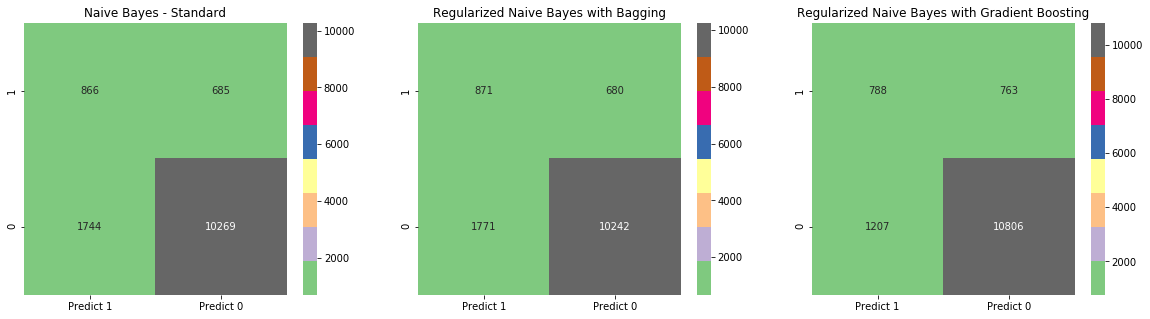

In [67]:
# Confusion matrix heat map - Naive Bayes - Standard vs Regularized bagging vs Regularized boosting
plt.figure(figsize = (20,5))
# print classification report with precision, recall, accuracy, f1 score and support
print("Classification score - Naive Bayes standard:\n",
      (classification_report(y_test, y_nbpredict)))
print("Classification score - Regularized Naive Bayes with bagging:\n",
      (classification_report(y_test, test_pred_bgnb)))
print("Classification score - Regularized Naive Bayes with boosting:\n",
      (classification_report(y_test, test_pred_gbnb)))
plt.subplot(131)
ax1=sns.heatmap(df_cmnb, cmap="Accent", annot=True,fmt = '')
ax1.title.set_text('Naive Bayes - Standard')
plt.subplot(132)
ax2=sns.heatmap(df_cm_bgnb, cmap="Accent", annot=True, fmt = '')
ax2.title.set_text('Regularized Naive Bayes with Bagging')
plt.subplot(133)
ax3=sns.heatmap(df_cm_gbnb, cmap="Accent", annot=True, fmt = '')
ax3.title.set_text('Regularized Naive Bayes with Gradient Boosting')

### Insights
- The standard Naive Bayes has a accuracy of 82% which is improved to 85% with boosting method whereas it remains the same with bagging method. Hence gradient boosting ensembling technique had increased the accuracy by 3% compared to standard Naive Bayes
- Though the accuracy is at 90% the precision and recall of the predicting a customer who would opt for the term deposit is just around 40% and 60% respectively for  all the models.

### Logistic Regression - Confusion Matrix heatmap and Classification report 

Classification score - Logistic Regression standard:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     12013
           1       0.57      0.48      0.52      1551

    accuracy                           0.90     13564
   macro avg       0.75      0.72      0.73     13564
weighted avg       0.89      0.90      0.90     13564

Classification score - Regularized Logistic Regression with bagging:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     12013
           1       0.57      0.49      0.52      1551

    accuracy                           0.90     13564
   macro avg       0.75      0.72      0.73     13564
weighted avg       0.89      0.90      0.90     13564

Classification score - Regularized Logistic Regression with boosting:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.62      0.37      0.4

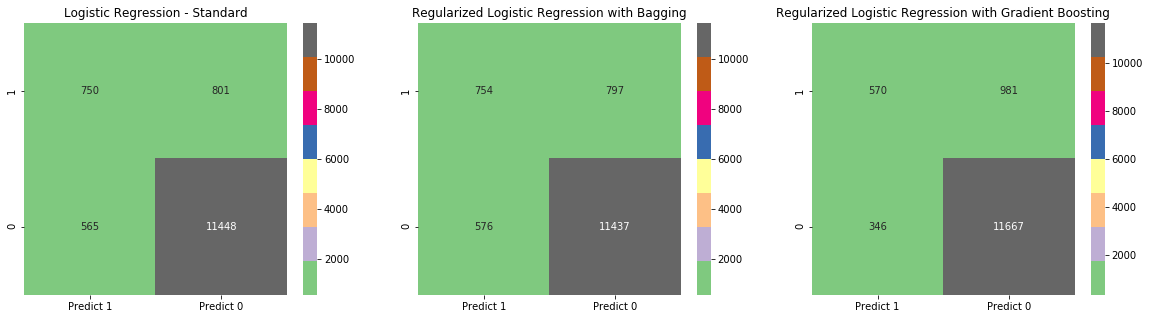

In [68]:
# Confusion matrix heat map - Logistic Regression - Standard vs Regularized bagging vs Regularized boosting
plt.figure(figsize = (20,5))
# print classification report with precision, recall, accuracy, f1 score and support
print("Classification score - Logistic Regression standard:\n",
      (classification_report(y_test, y_predict)))
print("Classification score - Regularized Logistic Regression with bagging:\n",
      (classification_report(y_test, test_pred_bglgreg)))
print("Classification score - Regularized Logistic Regression with boosting:\n",
      (classification_report(y_test, test_pred_gblgreg)))
plt.subplot(131)
ax1=sns.heatmap(df_cmlgreg, cmap="Accent", annot=True,fmt = '')
ax1.title.set_text('Logistic Regression - Standard')
plt.subplot(132)
ax2=sns.heatmap(df_cm_bglgreg, cmap="Accent", annot=True, fmt = '')
ax2.title.set_text('Regularized Logistic Regression with Bagging')
plt.subplot(133)
ax3=sns.heatmap(df_cm_gblgreg, cmap="Accent", annot=True, fmt = '')
ax3.title.set_text('Regularized Logistic Regression with Gradient Boosting')

### Insights
- The standard Logistic regression has a accuracy of 89.33% which is improved to 89.88% with bagging method and even further improved to 90.22% with gradient boosting method. Hence gradient boosting ensembling technique had increased the accuracy by 1% compared to standard Logistic regression
- Though the accuracy is at 90% the precision and recall of the predicting a customer who would opt for the term deposit is just around 60% and 40+% respectively for  all the models. 

### Random Forest - Confusion Matrix heatmap and Classification report 

Classification score - Random Forest standard:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.62      0.30      0.41      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564

Classification score - Regularized Random Forest with bagging:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.67      0.32      0.43      1551

    accuracy                           0.90     13564
   macro avg       0.79      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564

Classification score - Regularized Random Forest with boosting:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     12013
           1       0.60      0.44      0.51      1551

    a

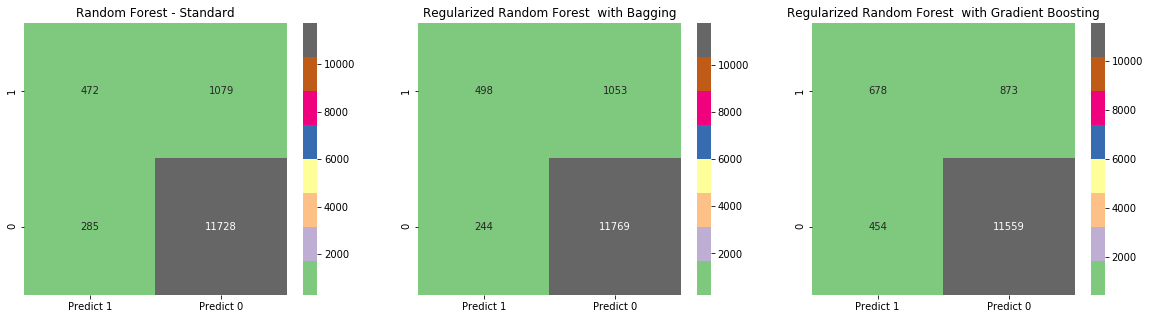

In [69]:
# Confusion matrix heat map - Random Forest- Standard vs Regularized bagging vs Regularized boosting
plt.figure(figsize = (20,5))
# print classification report with precision, recall, accuracy, f1 score and support
print("Classification score - Random Forest standard:\n",
      (classification_report(y_test, y_predict_rf)))
print("Classification score - Regularized Random Forest with bagging:\n",
      (classification_report(y_test, test_pred_bgrf)))
print("Classification score - Regularized Random Forest with boosting:\n",
      (classification_report(y_test, test_pred_gbrf)))
plt.subplot(131)
ax1=sns.heatmap(df_cmrf, cmap="Accent", annot=True,fmt = '')
ax1.title.set_text('Random Forest - Standard')
plt.subplot(132)
ax2=sns.heatmap(df_cm_bgrf, cmap="Accent", annot=True, fmt = '')
ax2.title.set_text('Regularized Random Forest  with Bagging')
plt.subplot(133)
ax3=sns.heatmap(df_cm_gbrf, cmap="Accent", annot=True, fmt = '')
ax3.title.set_text('Regularized Random Forest  with Gradient Boosting')


### Insights
- The standard Random forest has a accuracy of 90% which remains the same after ensembling with bagging and gradient boosting method. Hence no improvement in overall accuracy with any of the methods
- Though the overall accuracy is not improved by ensembling methods, the precision and recall of predicting the customers who subscribe for term deposit have significantly improved with ensembling technique. The precision and recall with standard method is around 60% and 30% respectively which had improved to 60% and 44% post gradient bossting there by resulting in better prediction of which customer would choose to take the term deposit

## Final conclusion
- We used 4 classification algorithms i.e Logistic Regression, Naive Bayes, Decision Tree and Random forest. All these 4 algorithms were used with  1. Standard, 2. Bagging and 3. Gradiient Boosting techniques. 

- Finally we can see there is a significant improvement in either accuracy or precision and recall.This helps with better predicting the right customers who would subscribe to the term deposits. Hence any of the ensemble methods always provide a better prediction than any of standard predictive algorithm.

- Also we can see that the algorithms like Logistic regression which naturally has very low tendency of overfitting gets very less benefit in ensembling whereas algorithms like Decision tree and Naive Bayes which are weak learners / overfit the training set, gets more benefit in ensembling it through bagging or boosting.